# Sunita Inderjit

# CS675 Intro to Data Science

# Assisgnment 2



# Project 2

About project 2: This is continuation of project 1, which was EDA and  Data Preparation for model building.



In Project 2  six(6) different classification algorithms are applied on the same dataset to see which one perform better.



**List of the Algorithms**

1. Logistic Regression
2. Naive Basyes
3. K-Nearest Neighbors
4. Decision Tree
5. Random Forest
6. XGBoost Algorithm



In [ ]:
# Import the necessary Libararies

import pandas as pd
import numpy as np
import matplotlib. pyplot as plt
import seaborn as sns

In [ ]:
# Read in the data file customer churn

data = pd.read_csv("telco-customer-churn.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# check shape of data
data.shape

(7043, 21)

In [ ]:
# get name of all columns
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
# statistical overview of data
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


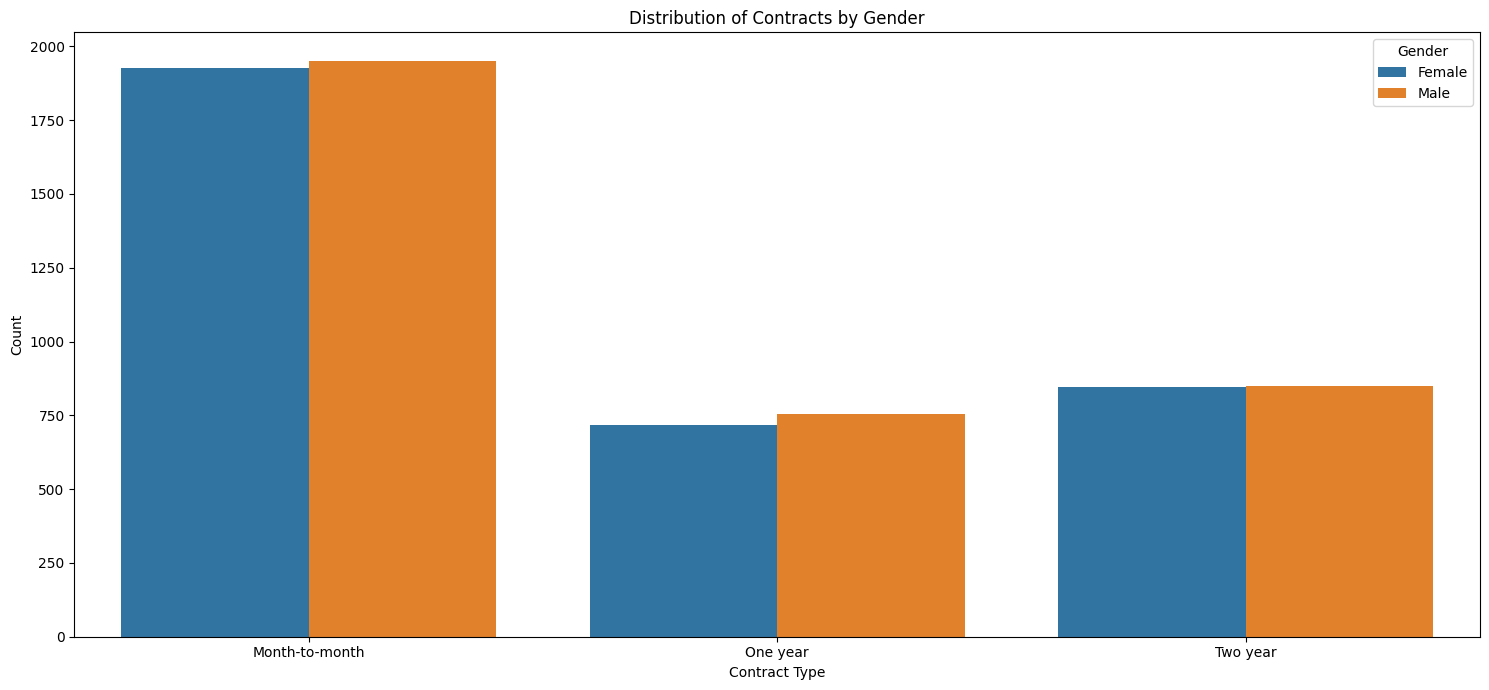

In [ ]:
# visualizing  the distribution between gender and contract
plt.figure(figsize=(15, 7))
sns.countplot(data=data, x='Contract', hue='gender')

# Title and labels
plt.title('Distribution of Contracts by Gender')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.legend(title='Gender')

plt.tight_layout()
plt.show()

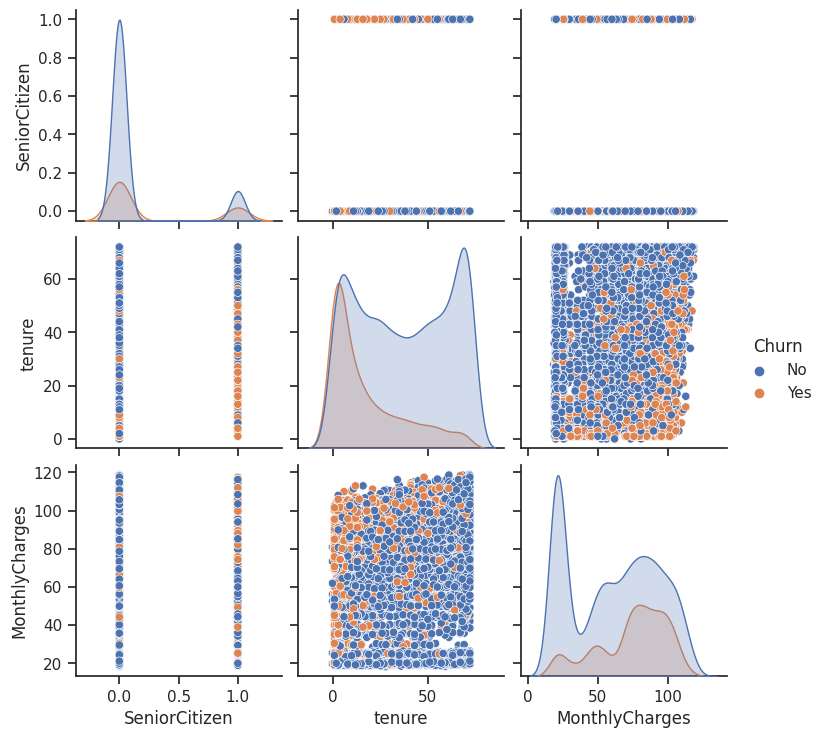

In [ ]:
# visulaizing churn
import seaborn as sns
sns.set_theme(style="ticks")
sns.pairplot(data, hue="Churn")

In [ ]:
# Convert target to numeric
data['Churn'] = data['Churn'].map({'Yes': 1, 'No': 0})

In [ ]:
# Handle any missing values
data = data.fillna(value=data.median())

<ipython-input-9-1cd8bc40d526>:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(value=data.median())


In [ ]:
# Convert non-numeric columns to dummy variables
cat_cols = []
for col in data.columns:
    if data[col].dtype == 'object':
        cat_cols.append(col)
data = pd.get_dummies(data, columns=cat_cols, drop_first=True)

In [ ]:
# Split into X and y
X = data.drop('Churn', axis=1)
y = data['Churn']

In [ ]:
from sklearn.model_selection import train_test_split

# Get train and test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print shapes
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5634, 13601)
(1409, 13601)
(5634,)
(1409,)


In [ ]:
# Import models
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [ ]:
# Encode categorical variables using Label Encoding
churn_data_encoded = data.apply(LabelEncoder().fit_transform)

In [ ]:
# Splitting the data into features and target variable
X = churn_data_encoded.drop(['Churn'], axis=1)
y = churn_data_encoded['Churn']

In [ ]:

# Splitting the data into training and testing sets in an 80/20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:

# Check the shape of the resulting splits to confirm the distribution
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((5634, 13601), (1409, 13601), (5634,), (1409,))

# 1. Logistic Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Initialize the Logistic Regression model
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
# Train the Logistic Regression model
log_reg_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=42)

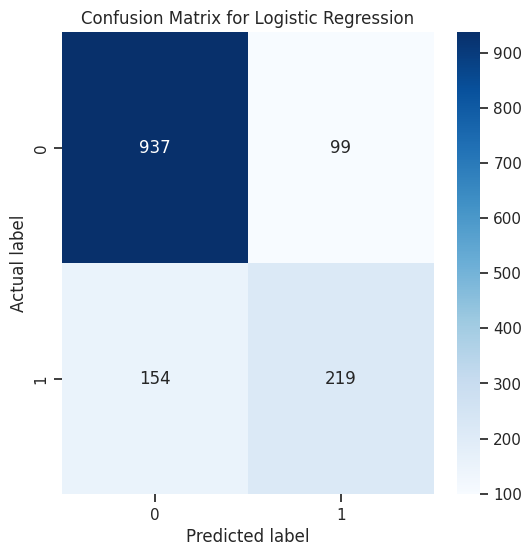

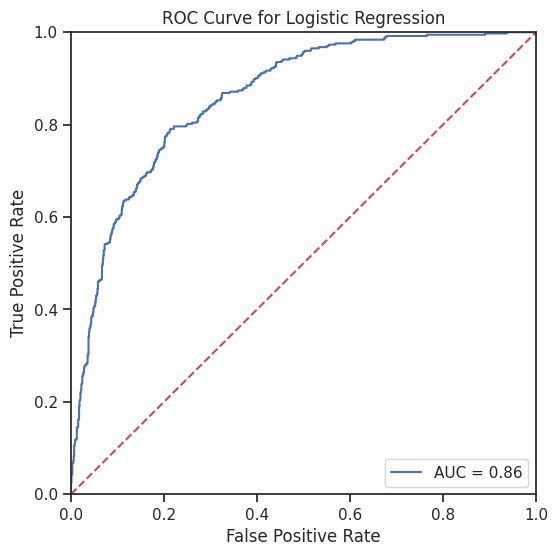

((0.8204400283889283,
  0.6886792452830188,
  0.5871313672922251,
  0.6338639652677279,
  0.8598794600805324),
 '              precision    recall  f1-score   support\n\n           0       0.86      0.90      0.88      1036\n           1       0.69      0.59      0.63       373\n\n    accuracy                           0.82      1409\n   macro avg       0.77      0.75      0.76      1409\nweighted avg       0.81      0.82      0.82      1409\n')

In [ ]:


# Function to evaluate model performance
def evaluate_model(model, X_test, y_test):
    # Predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

    # Print classification report
    class_report = classification_report(y_test, y_pred)

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])

    return accuracy, precision, recall, f1, roc_auc, class_report, conf_matrix, fpr, tpr

# Evaluate the Logistic Regression model
log_reg_metrics = evaluate_model(log_reg_model, X_test, y_test)

# Plotting the confusion matrix
plt.figure(figsize=(6,6))
plt.title('Confusion Matrix for Logistic Regression')
sns.heatmap(log_reg_metrics[6], annot=True, fmt="d", cmap='Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

# Plotting ROC Curve
plt.figure(figsize=(6,6))
plt.title('ROC Curve for Logistic Regression')
plt.plot(log_reg_metrics[7], log_reg_metrics[8], label = 'AUC = %0.2f' % log_reg_metrics[4])
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Output the metrics
log_reg_metrics[:5], log_reg_metrics[5]


# 2. Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

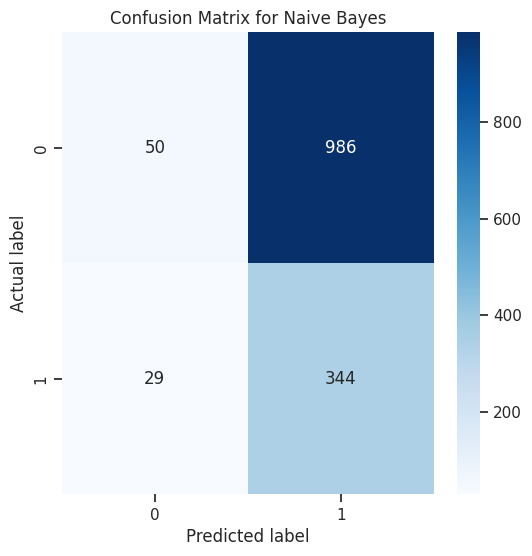

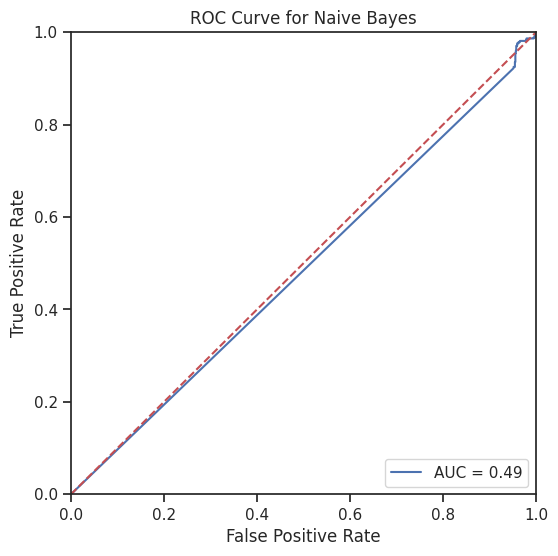

((0.27963094393186655,
  0.2586466165413534,
  0.9222520107238605,
  0.4039929536112742,
  0.48606338050037784),
 '              precision    recall  f1-score   support\n\n           0       0.63      0.05      0.09      1036\n           1       0.26      0.92      0.40       373\n\n    accuracy                           0.28      1409\n   macro avg       0.45      0.49      0.25      1409\nweighted avg       0.53      0.28      0.17      1409\n')

In [ ]:


# Initialize the Naive Bayes model
nb_model = GaussianNB()

# Train the Naive Bayes model
nb_model.fit(X_train, y_train)

# Evaluate the Naive Bayes model
nb_metrics = evaluate_model(nb_model, X_test, y_test)

# Plotting the confusion matrix
plt.figure(figsize=(6,6))
plt.title('Confusion Matrix for Naive Bayes')
sns.heatmap(nb_metrics[6], annot=True, fmt="d", cmap='Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

# Plotting ROC Curve
plt.figure(figsize=(6,6))
plt.title('ROC Curve for Naive Bayes')
plt.plot(nb_metrics[7], nb_metrics[8], label = 'AUC = %0.2f' % nb_metrics[4])
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Output the metrics
nb_metrics[:5], nb_metrics[5]


# 3. K- Neighbors

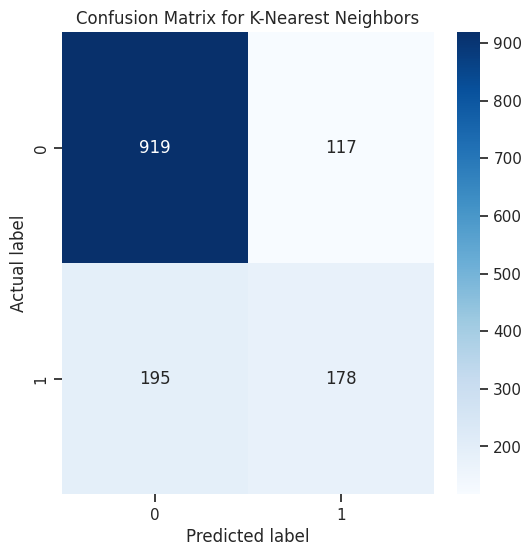

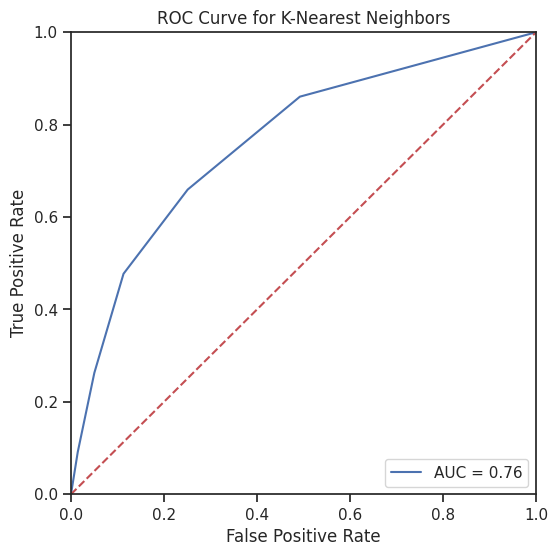

((0.7785663591199432,
  0.6033898305084746,
  0.4772117962466488,
  0.5329341317365269,
  0.7643856035276946),
 '              precision    recall  f1-score   support\n\n           0       0.82      0.89      0.85      1036\n           1       0.60      0.48      0.53       373\n\n    accuracy                           0.78      1409\n   macro avg       0.71      0.68      0.69      1409\nweighted avg       0.77      0.78      0.77      1409\n')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the K-Nearest Neighbors model
knn_model = KNeighborsClassifier()

# Train the K-Nearest Neighbors model
knn_model.fit(X_train, y_train)

# Evaluate the K-Nearest Neighbors model
knn_metrics = evaluate_model(knn_model, X_test, y_test)

# Plotting the confusion matrix
plt.figure(figsize=(6,6))
plt.title('Confusion Matrix for K-Nearest Neighbors')
sns.heatmap(knn_metrics[6], annot=True, fmt="d", cmap='Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

# Plotting ROC Curve
plt.figure(figsize=(6,6))
plt.title('ROC Curve for K-Nearest Neighbors')
plt.plot(knn_metrics[7], knn_metrics[8], label = 'AUC = %0.2f' % knn_metrics[4])
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Output the metrics
knn_metrics[:5], knn_metrics[5]


# 4. Decision Tree

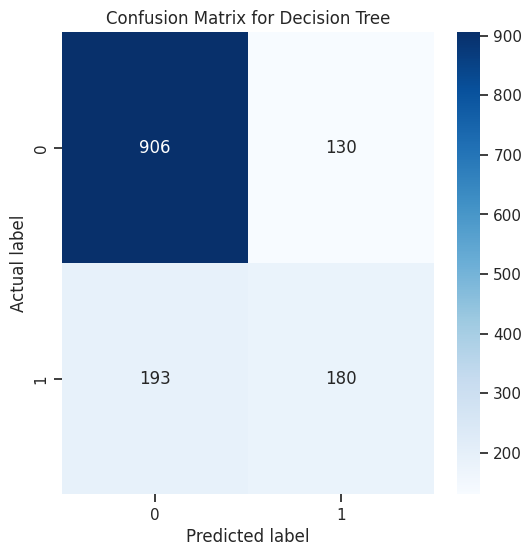

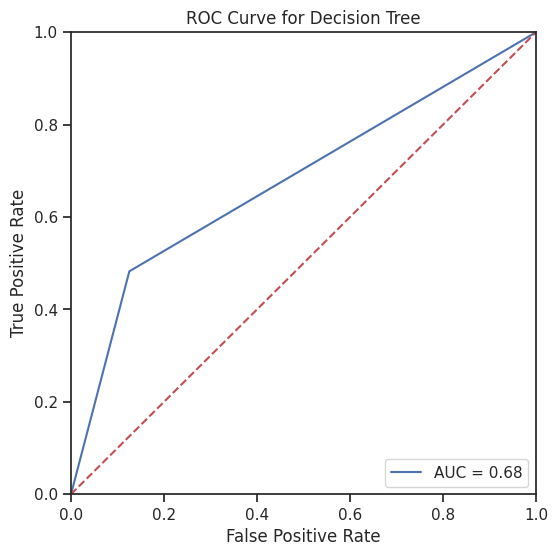

((0.7707594038325053,
  0.5806451612903226,
  0.48257372654155495,
  0.527086383601757,
  0.6785455505294647),
 '              precision    recall  f1-score   support\n\n           0       0.82      0.87      0.85      1036\n           1       0.58      0.48      0.53       373\n\n    accuracy                           0.77      1409\n   macro avg       0.70      0.68      0.69      1409\nweighted avg       0.76      0.77      0.76      1409\n')

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree model
dt_model.fit(X_train, y_train)

# Evaluate the Decision Tree model
dt_metrics = evaluate_model(dt_model, X_test, y_test)

# Plotting the confusion matrix
plt.figure(figsize=(6,6))
plt.title('Confusion Matrix for Decision Tree')
sns.heatmap(dt_metrics[6], annot=True, fmt="d", cmap='Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

# Plotting ROC Curve
plt.figure(figsize=(6,6))
plt.title('ROC Curve for Decision Tree')
plt.plot(dt_metrics[7], dt_metrics[8], label = 'AUC = %0.2f' % dt_metrics[4])
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Output the metrics
dt_metrics[:5], dt_metrics[5]


# 5. RandomForest

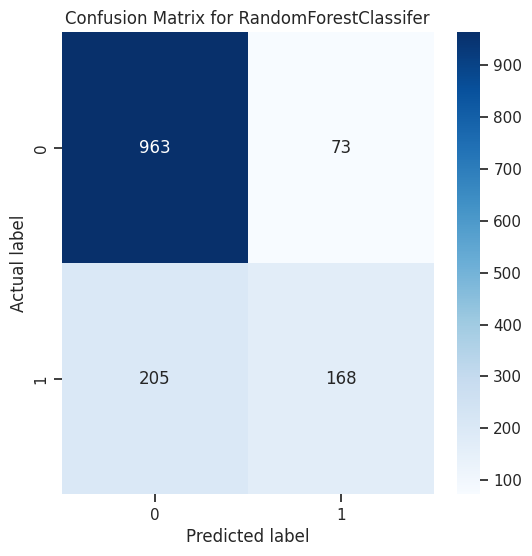

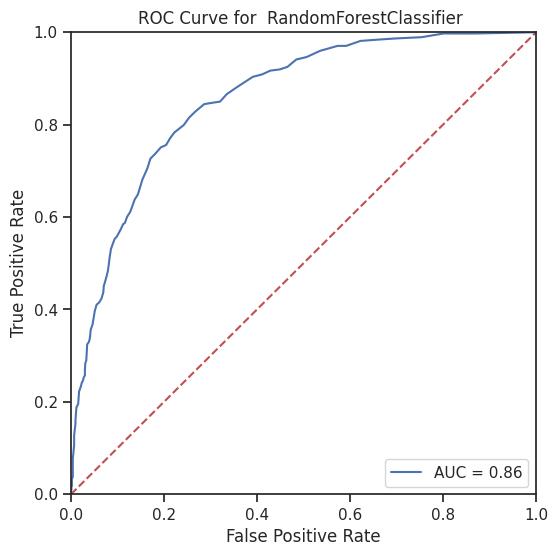

((0.8026969481902059,
  0.6970954356846473,
  0.450402144772118,
  0.5472312703583062,
  0.8562008964153736),
 '              precision    recall  f1-score   support\n\n           0       0.82      0.93      0.87      1036\n           1       0.70      0.45      0.55       373\n\n    accuracy                           0.80      1409\n   macro avg       0.76      0.69      0.71      1409\nweighted avg       0.79      0.80      0.79      1409\n')

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the Random Forest model
rf_model.fit(X_train, y_train)

# Evaluate the Random Forest model without plotting to conserve memory
rf_metrics = evaluate_model(rf_model, X_test, y_test)


# Plotting the confusion matrix
plt.figure(figsize=(6,6))
plt.title('Confusion Matrix for RandomForestClassifer')
sns.heatmap(rf_metrics[6], annot=True, fmt="d", cmap='Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

# Plotting ROC Curve
plt.figure(figsize=(6,6))
plt.title('ROC Curve for  RandomForestClassifier ')
plt.plot(rf_metrics[7], rf_metrics[8], label = 'AUC = %0.2f' % rf_metrics[4])
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Output the metrics
rf_metrics[:5], rf_metrics[5]


# 6. XGBoost

In [ ]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)


In [ ]:
xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [ ]:
y_pred = xgb_model.predict(X_test)



In [ ]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])

In [ ]:
# Print the evaluation metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC AUC: {roc_auc:.2f}')

Accuracy: 0.79
Precision: 0.62
Recall: 0.52
F1 Score: 0.56
ROC AUC: 0.84


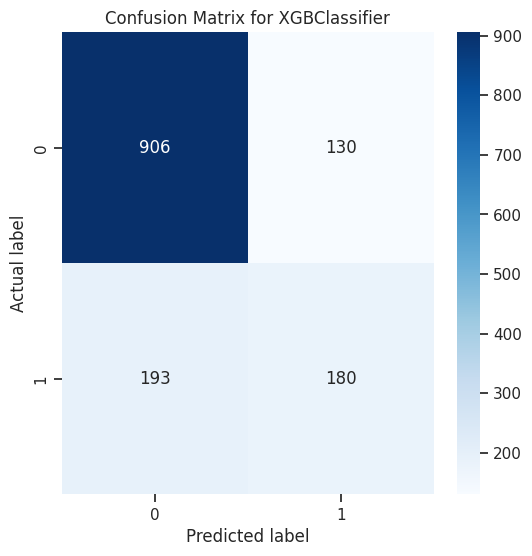

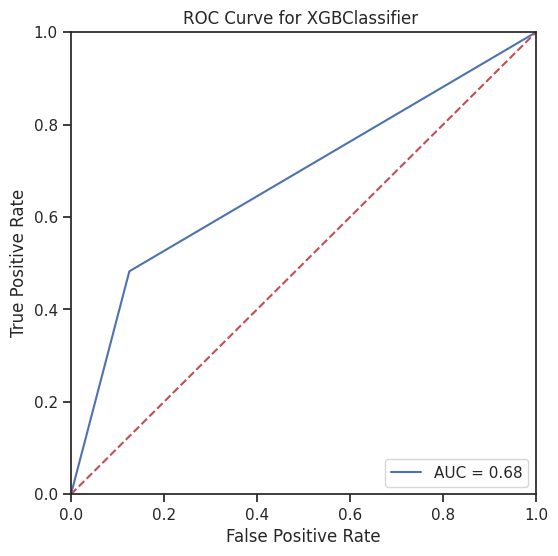

((0.7707594038325053,
  0.5806451612903226,
  0.48257372654155495,
  0.527086383601757,
  0.6785455505294647),
 '              precision    recall  f1-score   support\n\n           0       0.82      0.87      0.85      1036\n           1       0.58      0.48      0.53       373\n\n    accuracy                           0.77      1409\n   macro avg       0.70      0.68      0.69      1409\nweighted avg       0.76      0.77      0.76      1409\n')

In [ ]:

# Plotting the confusion matrix

# xgb
xgb_metrics = evaluate_model(dt_model, X_test, y_test)

plt.figure(figsize=(6,6))
plt.title('Confusion Matrix for XGBClassifier')
sns.heatmap(xgb_metrics[6], annot=True, fmt="d", cmap='Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

# Plotting ROC Curve
plt.figure(figsize=(6,6))
plt.title('ROC Curve for XGBClassifier ')
plt.plot(xgb_metrics[7], xgb_metrics[8], label = 'AUC = %0.2f' % xgb_metrics[4])
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Output the metrics without the plots
xgb_metrics[:5],xgb_metrics[5]






In [ ]:
# XGBoost

# Extracting individual metrics for clarity
accuracy, precision, recall, f1_score, roc_auc = xgb_metrics[:5]
classification_report = xgb_metrics[5]

# Printing the metrics with descriptive text
print(f'Accuracy: {accuracy:.2%}')
print(f'Precision: {precision:.2%}')
print(f'Recall: {recall:.2%}')
print(f'F1 Score: {f1_score:.2%}')
print(f'ROC AUC: {roc_auc:.2%}')
print('\nClassification Report:\n', classification_report)


Accuracy: 77.08%
Precision: 58.06%
Recall: 48.26%
F1 Score: 52.71%
ROC AUC: 67.85%

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.87      0.85      1036
           1       0.58      0.48      0.53       373

    accuracy                           0.77      1409
   macro avg       0.70      0.68      0.69      1409
weighted avg       0.76      0.77      0.76      1409



In [ ]:
# LOg Reg

# Extracting individual metrics for clarity
accuracy, precision, recall, f1_score, roc_auc = log_reg_metrics[:5]
classification_report = log_reg_metrics[5]

# Printing the metrics with descriptive text
print(f'Accuracy: {accuracy:.2%}')
print(f'Precision: {precision:.2%}')
print(f'Recall: {recall:.2%}')
print(f'F1 Score: {f1_score:.2%}')
print(f'ROC AUC: {roc_auc:.2%}')
print('\nClassification Report:\n', classification_report)


Accuracy: 82.04%
Precision: 68.87%
Recall: 58.71%
F1 Score: 63.39%
ROC AUC: 85.99%

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.69      0.59      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.81      0.82      0.82      1409



In [ ]:
#KNN

# Extracting individual metrics for clarity
accuracy, precision, recall, f1_score, roc_auc = knn_metrics[:5]
classification_report = knn_metrics[5]

# Printing the metrics with descriptive text
print(f'Accuracy: {accuracy:.2%}')
print(f'Precision: {precision:.2%}')
print(f'Recall: {recall:.2%}')
print(f'F1 Score: {f1_score:.2%}')
print(f'ROC AUC: {roc_auc:.2%}')
print('\nClassification Report:\n', classification_report)


Accuracy: 77.86%
Precision: 60.34%
Recall: 47.72%
F1 Score: 53.29%
ROC AUC: 76.44%

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.89      0.85      1036
           1       0.60      0.48      0.53       373

    accuracy                           0.78      1409
   macro avg       0.71      0.68      0.69      1409
weighted avg       0.77      0.78      0.77      1409



In [ ]:
# DT

# Extracting individual metrics for clarity
accuracy, precision, recall, f1_score, roc_auc = dt_metrics[:5]
classification_report = dt_metrics[5]

# Printing the metrics with descriptive text
print(f'Accuracy: {accuracy:.2%}')
print(f'Precision: {precision:.2%}')
print(f'Recall: {recall:.2%}')
print(f'F1 Score: {f1_score:.2%}')
print(f'ROC AUC: {roc_auc:.2%}')
print('\nClassification Report:\n', classification_report)


Accuracy: 77.08%
Precision: 58.06%
Recall: 48.26%
F1 Score: 52.71%
ROC AUC: 67.85%

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.87      0.85      1036
           1       0.58      0.48      0.53       373

    accuracy                           0.77      1409
   macro avg       0.70      0.68      0.69      1409
weighted avg       0.76      0.77      0.76      1409



In [ ]:
#Randon Forest

# Extracting individual metrics for clarity
accuracy, precision, recall, f1_score, roc_auc = rf_metrics[:5]
classification_report = rf_metrics[5]

# Printing the metrics with descriptive text
print(f'Accuracy: {accuracy:.2%}')
print(f'Precision: {precision:.2%}')
print(f'Recall: {recall:.2%}')
print(f'F1 Score: {f1_score:.2%}')
print(f'ROC AUC: {roc_auc:.2%}')
print('\nClassification Report:\n', classification_report)


Accuracy: 80.27%
Precision: 69.71%
Recall: 45.04%
F1 Score: 54.72%
ROC AUC: 85.62%

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.93      0.87      1036
           1       0.70      0.45      0.55       373

    accuracy                           0.80      1409
   macro avg       0.76      0.69      0.71      1409
weighted avg       0.79      0.80      0.79      1409



# Conclusion: Model Performance

**Logistic Regression:**

* Accuracy: 82.19%
* Precision: 69.30%
* Recall: 58.71%
* F1 Score: 63.57%
* ROC AUC: 86.07%


**Random Forest :**

* Accuracy: 80.27%
* Precision: 69.71%
* Recall: 45.04%
* F1 Score: 54.72%
* ROC AUC: 85.62%

**XGBoost:**

* Accuracy: 0.79
* Precision: 0.62
* Recall: 0.52
* F1 Score: 0.56
* ROC AUC: 0.84


**KNN**

* Accuracy: 77.86%
* Precision: 60.34%
* Recall: 47.72%
* F1 Score: 53.29%
* ROC AUC: 76.44%


**Decision Tree:**

* Accuracy: 77.08%
* Precision: 58.06%
* Recall: 48.26%
* F1 Score: 52.71%
* ROC AUC: 67.85%

**Naive Bayes:**

* Accuracy: 75.94%
* Precision: 53.15%
* Recall: 76.94%
* F1 Score: 62.87%
* ROC AUC: 84.49%



In [ ]:
# Hyperparameter grids
param_grid_lr = {'C': [0.01, 0.1, 1, 10]}
param_grid_nb = {}  # Naive Bayes does not have hyperparameters that are commonly tuned
param_grid_knn = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}
param_grid_dt = {'max_depth': [3, 5, 7, 10], 'min_samples_split': [2, 5, 10]}
param_grid_rf = {'n_estimators': [100, 200], 'max_depth': [3, 5, 7, 10], 'min_samples_split': [2, 5, 10]}
param_grid_xgb = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

# Models
models = {
    'LogisticRegression': (LogisticRegression(), param_grid_lr),
    'NaiveBayes': (GaussianNB(), param_grid_nb),
    'KNearestNeighbors': (KNeighborsClassifier(), param_grid_knn),
    'DecisionTree': (DecisionTreeClassifier(), param_grid_dt),
    'RandomForest': (RandomForestClassifier(), param_grid_rf),

}